In [53]:
from google.colab import drive  ## Mount Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using KNN to divide our dataset into optimal number of clusters then using XGB and other algos to classify into cllusters

In [54]:
import os
os.chdir('/content/drive/MyDrive/Urban')

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
import pandas as pd
df = pd.read_csv('cases_by_county.csv')
df.head()

,Unnamed: 0,date,rolling_average_cases_per_100k_centered,state,name,fipscode
0,1,2020-02-08,0.0,AL,"Lee County, AL",1081
1,2,2020-02-11,0.0,AL,"Lee County, AL",1081
2,3,2020-02-14,0.0,AL,"Lee County, AL",1081
3,4,2020-02-18,0.0,AL,"Lee County, AL",1081
4,5,2020-02-20,0.0,AL,"Lee County, AL",1081


In [57]:
df1 = pd.read_csv('wastewater_by_county.csv')
df1.head()

,Unnamed: 0,sampling_week,effective_concentration_rolling_average,region,state,name,fipscode
0,0,2020-01-01,134.841964,Midwest,IL,"Peoria County, IL",17143
1,1,2020-01-15,0.000000,Northeast,MA,"Suffolk County, MA",25025
2,2,2020-01-22,0.000000,Northeast,MA,"Suffolk County, MA",25025
3,3,2020-01-29,0.000000,Northeast,MA,"Suffolk County, MA",25025
4,4,2020-02-05,0.000000,Northeast,MA,"Suffolk County, MA",25025


In [58]:
df1 = df1.rename(columns={"sampling_week": "date"})

In [59]:
merged = pd.merge(df1,df, on=['date','fipscode'])
# Print the result

In [60]:
merged.drop(['name_x','state_x','Unnamed: 0_x','date','Unnamed: 0_y'],inplace=True,axis=1)

In [61]:
merged.head()

,effective_concentration_rolling_average,region,fipscode,rolling_average_cases_per_100k_centered,state_y,name_y
0,0.0,Northeast,25025,0.01777,MA,"Suffolk County, MA"
1,0.0,Northeast,25025,0.00000,MA,"Suffolk County, MA"
2,0.0,Northeast,25025,0.00000,MA,"Suffolk County, MA"
3,0.0,West,6079,0.00000,CA,"San Luis Obispo County, CA"
4,0.0,Northeast,25025,0.00000,MA,"Suffolk County, MA"


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged["region"] = le.fit_transform(merged.region)
merged["name_y"] = le.fit_transform(merged.name_y)
merged["state_y"] = le.fit_transform(merged.state_y)

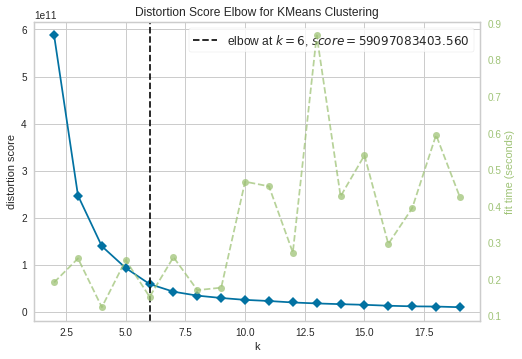

In [63]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(merged) 
visualizer.poof();

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
k_fit = kmeans.fit(merged)

In [65]:
clusters = k_fit.labels_
clusters

array([0, 0, 0, ..., 3, 2, 0], dtype=int32)

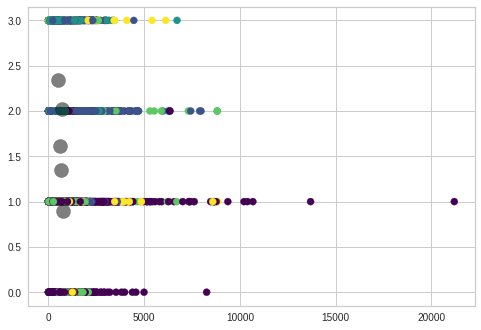

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(merged.iloc[:,0], merged.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5);

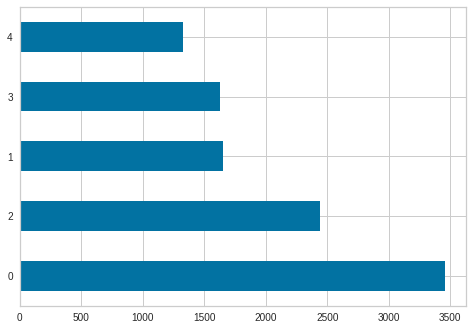

In [67]:
merged["class"] = clusters
merged["class"].value_counts().plot.barh();

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from catboost import CatBoostClassifier

In [69]:
data = merged.copy()
y = data["class"]
X = data.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [70]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [71]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.5299714557564225

In [72]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [73]:
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [74]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0